# Data-analysis

## 1. Load-data

In [3]:
import pandas as pd

train_raw = pd.read_csv("data/train.csv")
test_raw = pd.read_csv("data/test.csv")
submission_raw = pd.read_csv("data/submission.csv")

## 2. Data-info
- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수


In [4]:
train = train_raw.copy()
train.info()
train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0


In [5]:
test = test_raw.copy()
test.info()
test.head(3)
# no count variable in test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0


In [6]:
submission = submission_raw.copy()
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


## 3. EDA
### 3.1. Target data (y)

In [7]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'D2Coding.otf', name = 'D2Coding')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='D2Coding')

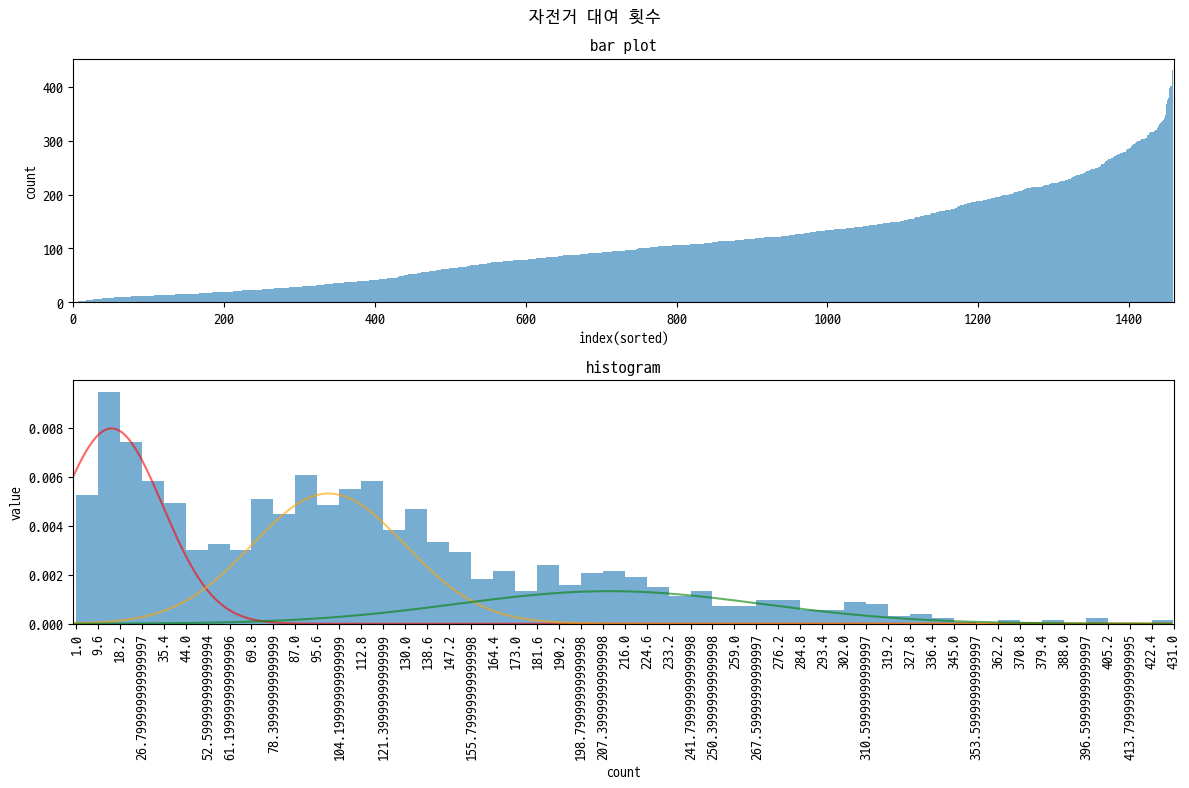

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plt.suptitle("자전거 대여 횟수")

# plot
axes[0].bar(train.index, train.sort_values(by='count')['count'], alpha=0.6, width=1.0)
axes[0].set_xlim(0, len(train['count']))
axes[0].set_title("bar plot")
axes[0].set_xlabel('index(sorted)')
axes[0].set_ylabel('count')

# histogram
hist = axes[1].hist(train['count'], alpha=0.6, bins=50, density=True)
axes[1].set_xlim(0, train['count'].max())
axes[1].set_xticks(hist[1])
axes[1].set_xticklabels(hist[1], rotation=90)
# axes[1].locator_params(axis='x', nbins=20)
axes[1].set_title("histogram")
axes[1].set_xlabel('count')
axes[1].set_ylabel('value')

# plt.hlines([train['count'].mean()], xmin=0, xmax=len(train), color='red', alpha=0.6)
# plt.hlines([train['count'].median()], xmin=0, xmax=len(train), color='blue', alpha=0.6)
# plt.vlines([15,100,210], ymin=0, ymax=120, color='red', alpha=0.6)
from scipy.stats import norm, poisson
import numpy as np

x = np.arange(0, 431, 1)
# y = poisson.pmf(x, mu=15)
# plt.plot(x, y/3, color='red', alpha=0.6)
y = norm(15, 20).pdf(x)
plt.plot(x, y*0.4, color='red', alpha=0.6)
y = norm(100, 30).pdf(x)
plt.plot(x, y*0.4, color='orange', alpha=0.6)
y = norm(210, 60).pdf(x)
plt.plot(x, y*0.2, color='green', alpha=0.6)

plt.tight_layout()
plt.show()

다음과 같은 직관을 얻을 수 있음
- 대여 횟수가 커질수록 관측된 횟수는 적어지는 경향을 보임
- 세 개의 정규분포가 중첩된 것처럼 보임
    - 첫 번째 정규분포의 평균 : 약 15번
    - 두 번째 정규분포의 평균 : 약 100번
    - 세 번째 정규분포의 평균 : 약 210번
- 그에 따라 나눈 구간
    - 9     <= x <= 27 
    - 87    <= x <= 121
    - 199   <= x <= 225
    - 345   <  x

In [9]:
area1 = train[(9<=train['count']) & (train['count']<=27)]
area2 = train[(87<=train['count']) & (train['count']<=121)]
area3 = train[(199<=train['count']) & (train['count']<=225)]
area4 = train[(345<=train['count'])]    # 이상치로 생각

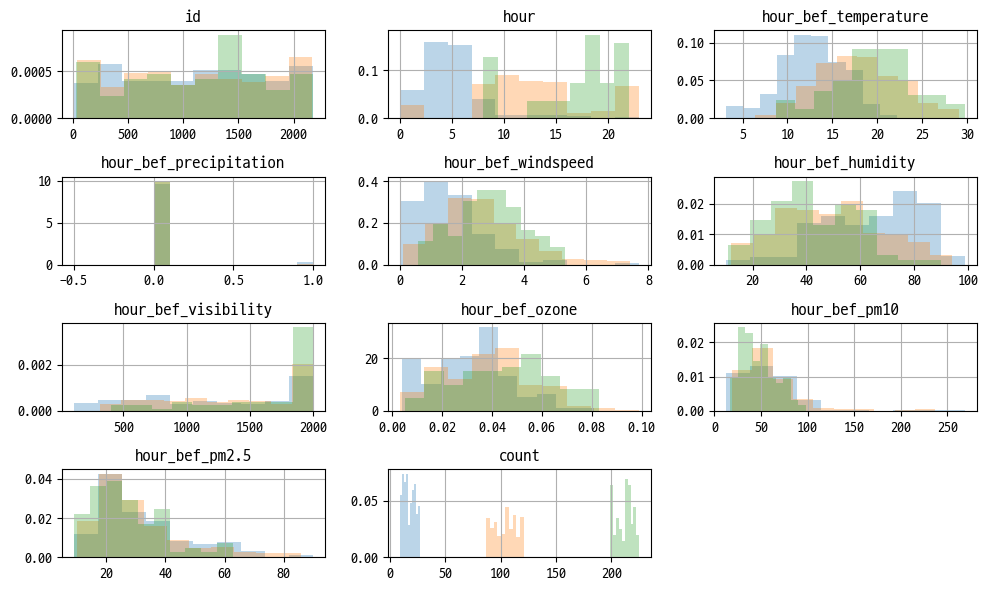

In [12]:
df1 = area1.hist(figsize=(10,6), alpha=0.3, density=True)
area2.hist(ax=df1.ravel()[:11], figsize=(10,6), alpha=0.3, density=True)
area3.hist(ax=df1.ravel()[:11], figsize=(10,6), alpha=0.3, density=True)
# area4.hist(ax=df1.ravel()[:11], figsize=(10,6), alpha=0.3, density=True, color="black")
# area3.hist(figsize=(10,6), alpha=0.4)
plt.tight_layout()
plt.show()

In [13]:
train.value_counts('hour_bef_precipitation')

hour_bef_precipitation
0.0    1411
1.0      46
dtype: int64

세 그룹에 대해 시각화해보았다.
- 첫번째 그룹: 대여 횟수가 적은 그룹(파랑), 두번째 그룹: 대여 횟수가 적당히 많은 그룹(주황), 세번째 그룹: 대여 횟수가 상당히 많은 그룹(녹색)
- 시간에서 나타나는 차이:       첫번째 < 두번째 < 세번째
- 기온에서 나타나는 차이:       첫번째 < 두번째 < 세번째
- 풍속에서 나타나는 차이:       첫번째 < 두번째 < 세번째
- 습도에서 나타나는 차이:       세번째 < 두번째 < 첫번째
- 가시성에 따라 나타나는 차이:  첫번째 < 두번째 < 세번째
- 오존에서 나타나는 차이:       첫번째 < 두번째 < 세번째
- pm10에서 나타나는 차이:       세번째 < 두번째 <= 첫번째

따라서,

    대여 횟수가 많은 그룹에서는 늦은 시간, 높은 기온, 빠른 풍속, 적은 습도, 높은 가시성, 높은 오존, 적은 미세먼지와 같은 양상이 나타났고 대여 횟수가 적은 그룹에서는 그 반대로 나타났다.

    이상치라고 생각했던 네번째 그룹 또한 비슷한 양상이 나타나므로 따로 구분할 필요가 없을 듯 하다.

또한, 비가 내렸는지에 대한 데이터를 확인해본 결과 과편향된 데이터임을 알 수 있었다.

In [11]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


### 3.2 Features data (X)

#### 3.2.1. Find key
key = id